### Mark Hoogendoorn and Burkhardt Funk (2017)              
Machine Learning for the Quantified Self               
Springer
Chapter 4     

In [2]:
from util.VisualizeDataset import VisualizeDataset
from Chapter4.TemporalAbstraction import NumericalAbstraction
from Chapter4.TemporalAbstraction import CategoricalAbstraction
from Chapter4.FrequencyAbstraction import FourierTransformation
from Chapter4.TextAbstraction import TextAbstraction
import copy
import pandas as pd
import numpy as np

In [3]:
# Let us create our visualization class again.
DataViz = VisualizeDataset()

In [4]:
# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = 'intermediate_datafiles/'
try:
    dataset = pd.read_csv(dataset_path + 'chapter3_result_final.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

dataset.index = dataset.index.to_datetime()

# Compute the number of milliseconds covered by an instane based on the first two rows
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000

C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  if __name__ == '__main__':


### Chapter 4: Identifying aggregate attributes.

In [5]:
acc_r = (dataset['acc_x']**2+dataset['acc_y']**2+dataset['acc_z']**2)
gyr_r = (dataset['gyr_x']**2+dataset['gyr_y']**2+dataset['gyr_z']**2)
dataset['acc_r'] = np.sqrt(acc_r)
dataset['gyr_r'] = np.sqrt(gyr_r)

In [6]:
# First we focus on the time domain.

# Set the window sizes to the number of instances representing 1 seconds, 5 seconds and 8 seconds
window_sizes = [int(float(400)/milliseconds_per_instance), int(float(800)/milliseconds_per_instance), int(float(1000)/milliseconds_per_instance)]

NumAbs = NumericalAbstraction()
dataset_copy = copy.deepcopy(dataset)
for ws in window_sizes:
    dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['acc_y'], ws, 'mean')
    dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['acc_y'], ws, 'std')

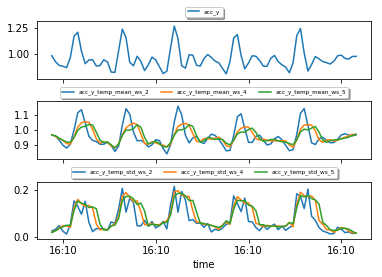

In [38]:
DataViz.plot_dataset(dataset_copy[(dataset.labelBenchPress == 1) & (dataset_copy.set == 1) & (dataset_copy.category == 'heavy')], ['acc_y', 'acc_y_temp_mean', 'acc_y_temp_std'], ['exact', 'like', 'like'], ['line', 'line', 'line'])

In [7]:
ws = int(float(1000)/milliseconds_per_instance)
selected_predictor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'acc_r', 'gyr_r']
dataset = NumAbs.abstract_numerical(dataset, selected_predictor_cols, ws, 'mean')
dataset = NumAbs.abstract_numerical(dataset, selected_predictor_cols, ws, 'std')

In [8]:
# Now we move to the frequency domain, with the same window size.

FreqAbs = FourierTransformation()
fs = float(1000)/milliseconds_per_instance

periodic_predictor_cols = ['acc_r', 'gyr_r']
data_table = FreqAbs.abstract_frequency(copy.deepcopy(dataset), ['acc_r'], int(float(10000)/milliseconds_per_instance), fs)

util\VisualizeDataset.py:36: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plot.hold(True)
C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\matplotlib\__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\matplotlib\axes\_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


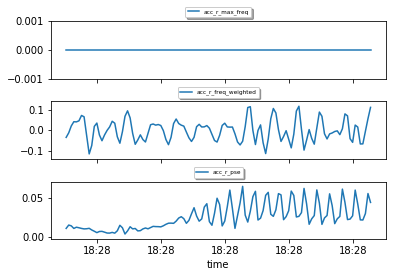

In [9]:
DataViz.plot_dataset(data_table[data_table['set'] == data_table['set'].unique()[1]], ['acc_r_max_freq', 'acc_r_freq_weighted', 'acc_r_pse'], ['like', 'like', 'like'], ['line', 'line', 'line'])

In [10]:
dataset = FreqAbs.abstract_frequency(dataset, periodic_predictor_cols, int(float(10000)/milliseconds_per_instance), fs)

In [11]:
dataset.to_csv(dataset_path + 'chapter4_result.csv')